# Die vier Hauptbedingungen für eine einfache lineare Regression

1. Linearity: Jede Variable (Xi) is linear mit der Ausgangsvariable (Y) verbunden
2. Normality: Die Fehler sind gleichverteilt.
3. Independent Observation: Jede beobachtete Variable im Datensatz ist unabhängig
4. Homoscedasticity: Die Variante der Fehler ist konstant.

# Beispiele

Wir werden diese vier Annahmen anhand von einem Datensatz überprüfen.



In [2]:
# import packages
import pandas as pd
import seaborn as sns

Seaborn bietet ein großes Set an Datensätzen an, die man sich anschauen kann (https://medium.com/@Aqsaumar48/seaborn-6ceda1a3d14a). Wir wählen in dem Fall den Datensatz für Autounfälle, also car_crashes.csv

Total: Total number of crashes.
Speeding: Crashes involving speeding.
Alcohol: Crashes involving alcohol.
Not Distracted: Percentage of drivers not distracted.
No Previous: Percentage of drivers with no previous crashes.
Ins_premium: Average insurance premium in the state.
Ins_losses: Total insurance losses in the state.

In [3]:
data = sns.load_dataset("car_crashes")
data.head(n=10)

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE
8,5.9,2.006,1.593,5.900,5.900,1273.89,136.05,DC
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL


Im Anschluss können wir prüfen, wie viele Einträge es gibt. Hier sind es 51 Zeilen und 8 Spalten.

In [8]:
data.shape
data.info()
# data['speeding'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


Wichtig: Vor jeder Analyse prüfen, ob es Duplikate gibt

In [12]:
data.dropna()
data.reset_index(inplace=True, drop=True)

# Explorative Datenanalyse

Wir prüfen, ob es lineare Zusammenhänge zwischen unterschiedliche Variablen im Dataframe gibt. Hierzu erstellen wir ein Scatterplot. Seaborn bietet eine sehr hilfreiche Funktion, um alle relevanten Paare zu generieren.
Ausghend von der Matrix können wir einige lineare Zusammenhänge erkennen.

- alcohol + total
- speeding + total

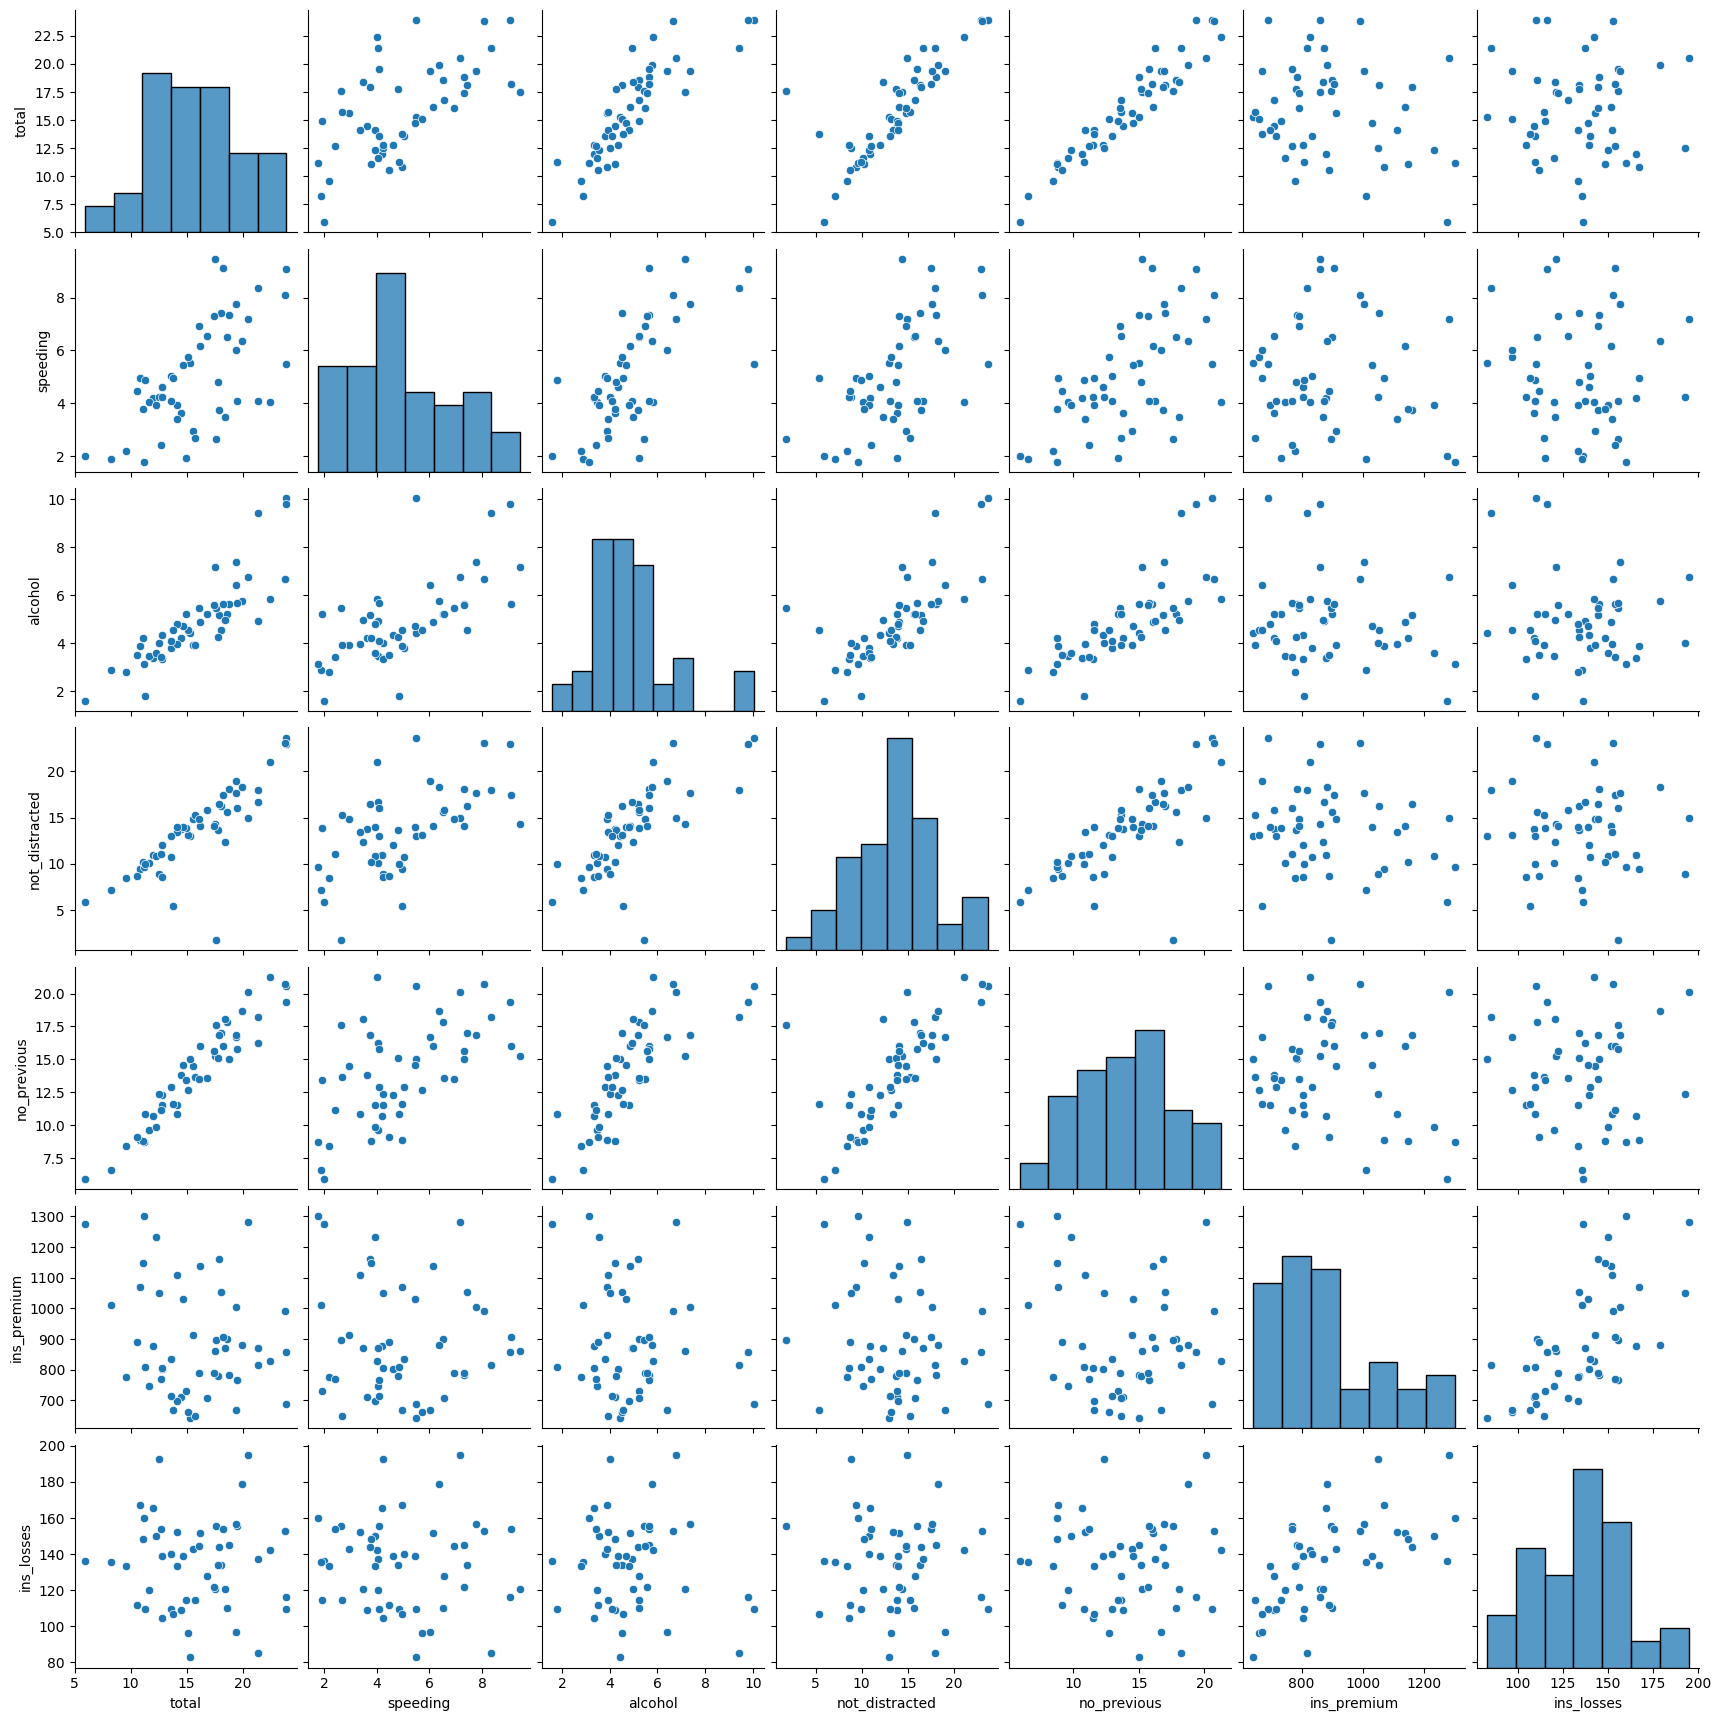

In [13]:
sns.pairplot(data)

Schauen wir uns mal speeding genauer an und prüfen, ob es Ausreißer gibt. Alles was mehr als 3 Standardabweichungen vom Mittelwert entfernt ist, wäre für uns ein Ausreißer. Das schaut aber gut aus.

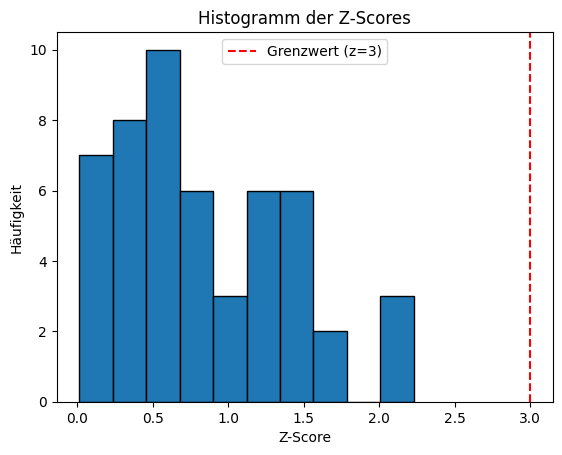

In [25]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt


data_speeding = data["speeding"]

z_scores = np.abs(stats.zscore(data_speeding))


# Histogramm plotten
plt.hist(z_scores, bins=10, edgecolor='black')
plt.title("Histogramm der Z-Scores")
plt.xlabel("Z-Score")
plt.ylabel("Häufigkeit")
plt.axvline(3, color='red', linestyle='dashed', linewidth=1.5, label='Grenzwert (z=3)')
plt.legend()
plt.show()


# Modell erstellen

Wir wählen eine einfache lineare Regression mit OLS. Wir möchten die Anzahl an Unfälle (abhängig) zu der Geschwindigkeit (unabhängig) ermitteln.

In [26]:
ols_data = data[["speeding", "total"]]
ols_formula = "total ~ speeding"

Interessant an der Stelle ist schon der niedriger R-Wert

In [33]:
# Import ols function
from statsmodels.formula.api import ols
OLS = ols(formula=ols_formula, data = ols_data)
model = OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  total   R-squared:                       0.374
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     29.27
Date:                Wed, 30 Jul 2025   Prob (F-statistic):           1.87e-06
Time:                        16:01:31   Log-Likelihood:                -132.15
No. Observations:                  51   AIC:                             268.3
Df Residuals:                      49   BIC:                             272.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      9.5459      1.243      7.680      0.000       7.048      12.044
speeding       1.2493      0.231      5.411      0.000       0.785       1.713
==============================================================================
Omnibus:                        2.847   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.241   Jarque-Bera (JB):                2.681
Skew:                           0.542   Prob(JB):                        0.262
Kurtosis:                       2.709   Cond. No.                         14.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='speeding', ylabel='total'>

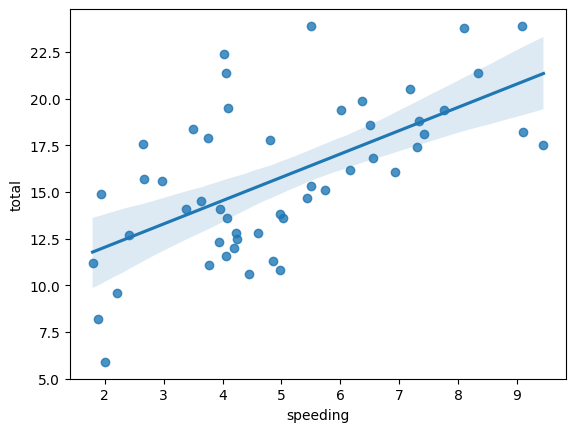

In [35]:
sns.regplot(x = "speeding", y = "total", data = ols_data)

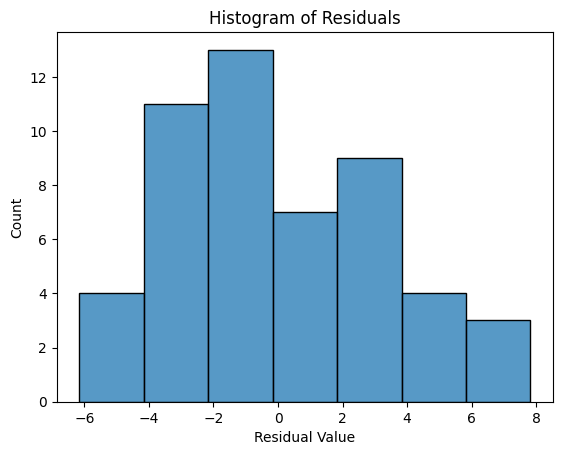

In [41]:
X = ols_data["speeding"]
fitted_values = model.predict(X)
fitted_values

residuals = model.resid
residuals

import matplotlib.pyplot as plt
fig = sns.histplot(residuals)
fig.set_xlabel("Residual Value")
fig.set_title("Histogram of Residuals")
plt.show()

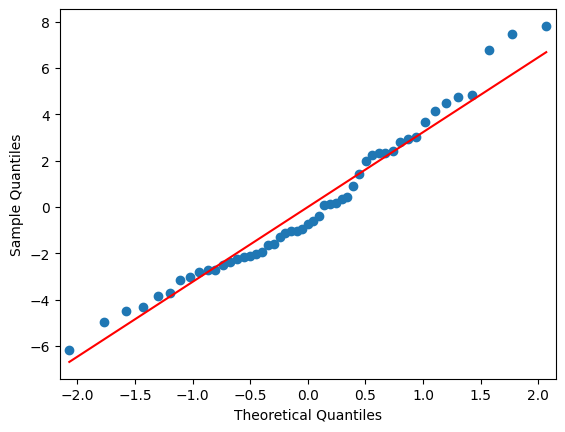

In [42]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
fig = sm.qqplot(model.resid, line = 's')
plt.show()

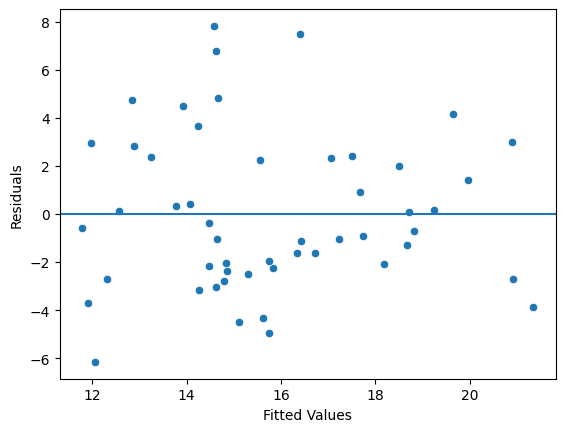

In [43]:
# Import matplotlib
import matplotlib.pyplot as plt
fig = sns.scatterplot(x=fitted_values, y=residuals)

# Add reference line at residuals = 0
fig.axhline(0)

# Set x-axis and y-axis labels
fig.set_xlabel("Fitted Values")
fig.set_ylabel("Residuals")

# Show the plot
plt.show()